## Step 1 : Business Problem Understanding
### Advanced Housing Prices - Feature Engineering

* Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.


## Step 2 : Data Understanding 

### Importing Libraries  and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to visualise al the columns in the dataframe
#pd.pandas.set_option('display.max_columns', None)

In [2]:
dataset=pd.read_csv(r'C:\Users\SAMEER\Projects\Machine Learning\Linear Regression\House price Advance Linear Regression\train.csv')

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
## print shape of dataset with rows and columns
print(dataset.shape)

(1460, 81)


## Step 3 : Data Preprocessing 

### Missing Values 

In [4]:
# Checking for missing values in the 'GrLivArea' column
missing_values = dataset['GrLivArea'].isnull().sum()
print("Missing values in the 'GrLivArea' column:", missing_values)

Missing values in the 'GrLivArea' column: 0


In [5]:
# Checking for missing values in the 'GrLivArea' column
missing_values = dataset['BedroomAbvGr'].isnull().sum()
print("Missing values in the 'BedroomAbvGr' column:", missing_values)

Missing values in the 'BedroomAbvGr' column: 0


In [6]:
# Checking for missing values in the 'FullBath' column
missing_values = dataset['FullBath'].isnull().sum()
print("Missing values in the 'FullBath' column:", missing_values)

Missing values in the 'FullBath' column: 0


### There are no missing values in the columns where we have to do operations

In [7]:
# Select relevant features (square footage, number of bedrooms, number of bathrooms) and the target variable (house prices)
X = dataset[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = dataset['SalePrice']

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

## Step 4 : Modelling
Implementing LinearRegression Model

In [9]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

## Step 5 : Evaluation
* Prediction

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([300775.43672347, 166148.29734725, 125635.67980201, 216821.75334224,
       113643.94500862, 134068.16842717, 184525.55712859, 144217.46704943,
       512629.41807336, 173403.95568525, 200412.36738208, 179874.24614099,
       240595.0198112 ,  92901.48482546, 140550.18723441, 137627.4145954 ,
       234113.00100396, 102624.51303632, 128336.5209717 , 164954.06305684,
       148004.32033874, 143256.89257984, 111813.23718899, 186362.12912398,
       201048.8409113 , 155879.23672671, 196301.22462841, 119705.55758021,
       209805.43047682, 155026.69590391, 190245.47623257, 218124.02127944,
       122184.46728057, 235835.67517681, 247401.1395588 , 182580.95148642,
       222991.39956062,  90956.87918329, 224600.17591093, 309628.52010828,
       231514.32930532, 142596.96234762, 167888.37552335, 224714.07373347,
       300223.72866204, 129086.70379946, 112785.54001008,  92253.28294474,
       208184.92577501, 124129.07292274, 314598.0678605 , 111591.30571967,
       198467.7617399 , 1

In [11]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 48454.09408090205


## Predict the New Data

In [12]:
# Example: Predict house price for a new data point
new_data_point = pd.DataFrame([[2000, 3, 2]], columns=['GrLivArea', 'BedroomAbvGr', 'FullBath'])
predicted_price = model.predict(new_data_point)
print(f"Predicted Price for the new data point: ${predicted_price[0]}")

Predicted Price for the new data point: $242431.59180658287


In [13]:
# Example 2: Predict house price for a new data point
new_data_point = pd.DataFrame([[3000, 5, 4]], columns=['GrLivArea', 'BedroomAbvGr', 'FullBath'])
predicted_price = model.predict(new_data_point)
print(f"Predicted Price for the new data point: ${predicted_price[0]}")

Predicted Price for the new data point: $355878.27223674697


In [17]:
# Example 2: Predict house price for a new data point
new_data_point = pd.DataFrame([[3500, 6, 5]], columns=['GrLivArea', 'BedroomAbvGr', 'FullBath'])
predicted_price = model.predict(new_data_point)
print(f"Predicted Price for the new data point: ${predicted_price[0]}")

Predicted Price for the new data point: $412601.61245182925


In [18]:
# Example 2: Predict house price for a new data point
new_data_point = pd.DataFrame([[2000, 3, 2]], columns=['GrLivArea', 'BedroomAbvGr', 'FullBath'])
predicted_price = model.predict(new_data_point)
print(f"Predicted Price for the new data point: ${predicted_price[0]}")

Predicted Price for the new data point: $242431.59180658287


## Model is working very well 

## Visualization : Actual vs Predicted prices 

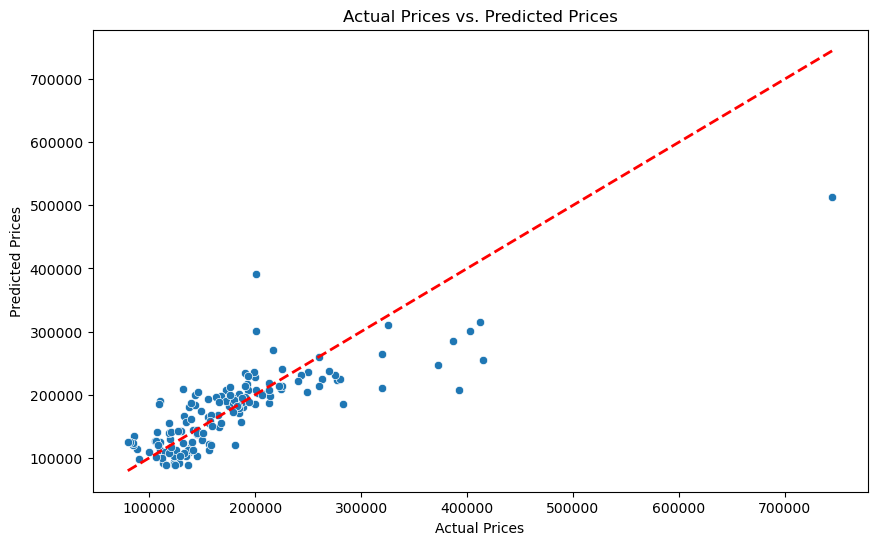

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

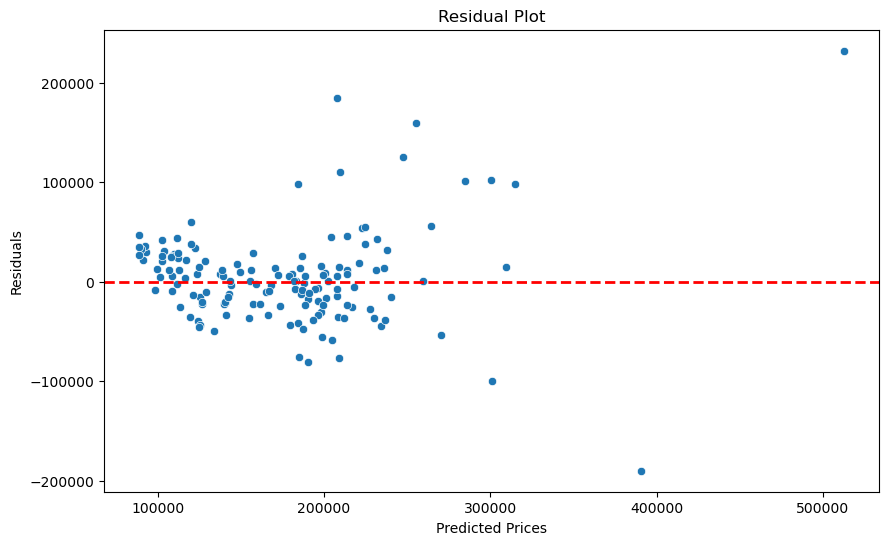

In [15]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

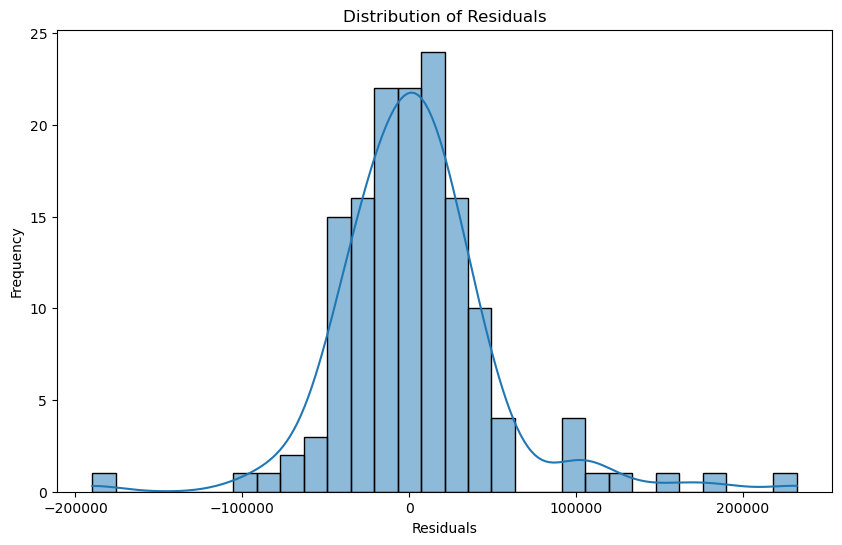

In [16]:
# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()